In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing required datasets
df = pd.read_csv("Train.csv")
df.shape

(3132, 9)

In [3]:
x_test = pd.read_csv("Test.csv")
x_test.shape

(1045, 9)

In [4]:
#storing target column as a seperate variable
y = df['Target']
df.drop(['Target'],axis=1,inplace=True)
print(y)

0        9
1       12
2       10
3       15
4        6
        ..
3127     9
3128    12
3129    11
3130     9
3131     6
Name: Target, Length: 3132, dtype: int64


C:\Users\chira\AppData\Local\Temp/ipykernel_21780/2225569098.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<AxesSubplot:>

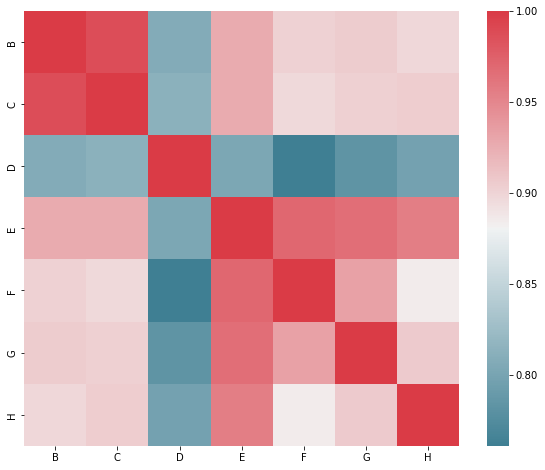

In [5]:
# making correlation matrix to check for column interdependecny
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [6]:
# using dummy encoding on column A
final_features = pd.get_dummies(df,drop_first=True)

In [7]:
final_features.to_csv("new_df.csv")

In [8]:
final_features.iloc[:,1]

0       0.455
1       0.395
2       0.530
3       0.365
4       0.400
        ...  
3127    0.400
3128    0.550
3129    0.395
3130    0.465
3131    0.475
Name: C, Length: 3132, dtype: float64

In [9]:
final_features.describe()

,B,C,D,E,F,G,H,A_I,A_M
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.525750,0.409254,0.140070,0.834224,0.362219,0.181684,0.240351,0.316731,0.366858
std,0.119131,0.098557,0.042661,0.491449,0.223000,0.109317,0.139567,0.465276,0.482024
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.444000,0.187000,0.093500,0.130000,0.000000,0.000000
50%,0.545000,0.425000,0.145000,0.804500,0.339500,0.171750,0.235000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.156750,0.506500,0.255000,0.330000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,1.000000,1.000000


In [10]:
# standardisation of numerical data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [11]:
from sklearn.preprocessing import MinMaxScaler
 
sc = MinMaxScaler()
# model=scaler.fit(data)

In [12]:
# fitting data to standard scaler model
x_train = SC.fit_transform(final_features.iloc[:,:-2])

In [13]:
x_train = pd.DataFrame(x_train, columns = final_features.columns[:-2])

In [14]:
x_train.shape

(3132, 7)

In [15]:
final_features.iloc[3000,:]

B      0.6100
C      0.4600
D      0.1450
E      1.1185
F      0.4780
G      0.2945
H      0.2985
A_I    0.0000
A_M    0.0000
Name: 3000, dtype: float64

In [16]:
dff = final_features.iloc[:,7:9]
dff.iloc[3117,:]

A_I    0
A_M    0
Name: 3117, dtype: uint8

In [17]:
x_train.iloc[3000,:]

B    0.707314
C    0.514966
D    0.115576
E    0.578536
F    0.519280
G    1.032172
H    0.416706
Name: 3000, dtype: float64

In [18]:
#horizontal concatenation of dummy encoded columns as no need to standardise those
horizontal_concat1 = pd.concat([x_train, dff], axis=1)

In [19]:
horizontal_concat1.shape

(3132, 9)

In [20]:
x_train = horizontal_concat1

In [21]:
x_train.shape

(3132, 9)

In [22]:
x_train.iloc[3118:,:].isnull().sum()

B      0
C      0
D      0
E      0
F      0
G      0
H      0
A_I    0
A_M    0
dtype: int64

In [23]:
final_features1 = pd.get_dummies(x_test,drop_first=True)
n = final_features1['Index']
final_features1.drop(['Index'], axis=1, inplace = True)
# x_test = final_features1
final_features1.shape

(1045, 9)

In [24]:
dff1 = final_features1.iloc[:,7:9]

In [25]:
x_test = SC.transform(final_features1.iloc[:,:-2])
x_test = pd.DataFrame(x_test, columns = final_features1.columns[:-2])
x_test.shape
x_test = pd.concat([x_test, dff1] ,axis=1)

In [26]:
# Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 9)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [27]:
# using random forest for final predictions
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 250, random_state = 0)
regressor.fit(x_train, y)
Y_pred = regressor.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
regressor.score(x_train, y)
regressor = round(regressor.score(x_train,y) * 100, 2)
regressor

94.03

In [29]:
# making answer dataframe
ans_p = pd.DataFrame({
    "Index":n,"Target":Y_pred
})

In [30]:
df_final4 = pd.DataFrame(ans_p,index=None)

In [31]:
#  storing answer dataframe
df_final4.to_csv("ans5.csv")